In [1]:
import numpy as np
from numpy import sin, cos
from scipy.integrate import odeint
from scipy import constants as const
from recordclass import recordclass

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Name the $y$ vector's components so that I don't go crazy:

In [2]:
Vars   = recordclass('Vars',   ['phi', 'alpha', 'theta', 'P_phi', 'P_alpha', 'P_theta'])
Params = recordclass('Params', ['m', 'I_1', 'I_2', 'I_3', 'l_2', 'k'])

Define the right hand side of the equation.
$y$ can be a vector, $t$ is what we derive by, the rest are arbitrary parameters.

In [3]:
def dydt(y, t, p):
    y = Vars(*y)
    d = Vars(*([np.NaN]*6))
    d.alpha = y.P_alpha / (p.I_2 + 2*p.m * p.l_2**2 * cos(y.alpha)**2)
    z        = p.I_2 + p.m * p.l_2**2 * sin(y.alpha)**2
    d.phi   = (y.P_phi + y.P_theta*cos(y.alpha)) / z
    d.theta = (y.P_phi*cos(y.alpha) + y.P_theta*(cos(y.alpha)**2)) / z + y.P_theta / p.I_3
    d.P_alpha = -(
        (p.I_2 - p.I_3) * (d.phi**2)*sin(y.alpha)*cos(y.alpha)
        + p.I_3*d.theta*d.phi*sin(y.alpha)
        + p.m*(p.l_2**2)*sin(y.alpha)*cos(y.alpha) * (d.phi**2 + 2*d.alpha**2)
        - p.m*const.g*p.l_2*cos(y.alpha)
    )
    d.P_phi   = -p.k*y.phi
    d.P_theta = 0
    return d

Initial conditions on $y$, parameters

In [4]:
init   = Vars(1,1,1,1,1,1)
params = Params(1,1,1,1,1,1)

Integrate from 0 to 100

In [5]:
t = np.linspace(0,100,1000)
sol=odeint(dydt, init, t, args=(params,))

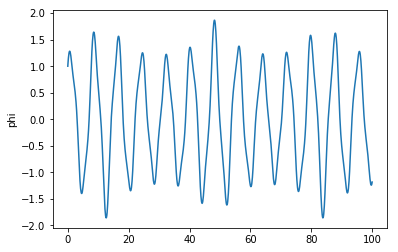

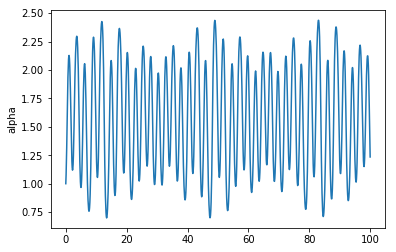

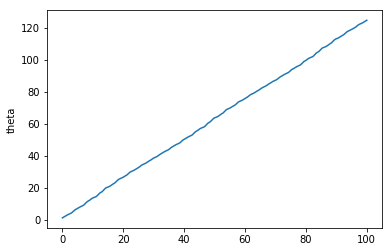

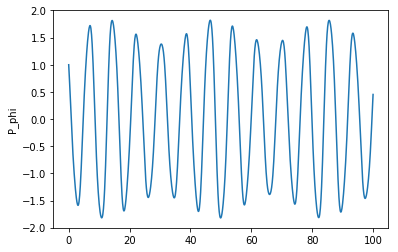

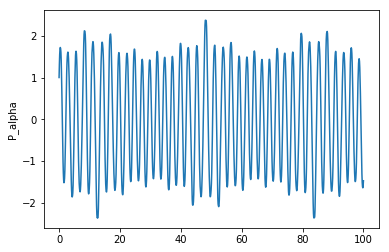

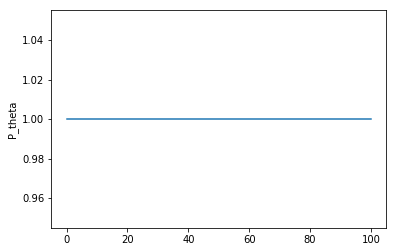

In [6]:
for i, name in enumerate(Vars._fields):
    plt.figure(1+i)
    plt.ylabel(name)
    plt.plot(t, sol[:,i])

Note: Method used:
Real-valued Variable-coefficient Ordinary Differential Equation solver, with fixed-leading-coefficient implementation. It provides automatic method switching between implicit Adams method (for non-stiff problems) and a method based on backward differentiation formulas (BDF) (for stiff problems).